In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-03 11:29:39.417289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 11:29:39.417420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 11:29:39.575830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading MNIST data

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

### Visualizing single array image

In [7]:
single_image = X_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

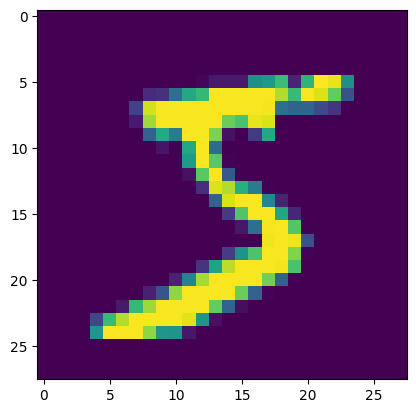

In [9]:
#Since it is a 2D array(28,28) matplotlib will easily do
plt.imshow(single_image) ## Gray Scale image (Color is because default cmap of matplotlib)

## Preprocessing the Data

In [10]:
# reshaping the img array in the way to mention the (batch_size,width,height,color_channels)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [11]:
#one hot encoding by keras.utils 
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [12]:
y_train_c.shape

(60000, 10)

In [13]:
y_train_c[9] ## the index is 4 means the it is digit 4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [14]:
#normalizing the X data
X_train.max() , X_train.min()

(255, 0)

In [15]:
#since the pixels are from 1 to 255 
#we can easily standardize into(0,1) by dividing them all by 255

X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[4].shape ,X_train[4].max() #done 

((28, 28, 1), 1.0)

## Building CNN Model

In [17]:
model = Sequential()
#adding the layers in the order -> (CNN,POOL,FC,OUT)

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu')) #inputshape of one img array
model.add(MaxPool2D(pool_size=(3,3)))
#before going to the FC the output feature should be flatten out
model.add(Flatten())
model.add(Dense(128,activation='relu',input_shape=(28,28,1)))
#Output layer-> 10 neurons since it has 10 classes
model.add(Dense(10,activation='softmax',input_shape=(28,28,1)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
#Earlystoppings to prevent the model from overfittings
callback = EarlyStopping(min_delta=0.001,patience=2,restore_best_weights=True)

In [20]:
model.fit(x=X_train,y=y_train_c,validation_data=(X_test,y_test_c),batch_size=256,epochs=60,callbacks=[callback])

Epoch 1/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.8384 - loss: 0.5946 - val_accuracy: 0.9707 - val_loss: 0.1001
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9748 - loss: 0.0851 - val_accuracy: 0.9807 - val_loss: 0.0573
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9838 - loss: 0.0535 - val_accuracy: 0.9849 - val_loss: 0.0458
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9855 - val_loss: 0.0422
Epoch 5/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9865 - val_loss: 0.0383
Epoch 6/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9915 - loss: 0.0298 - val_accuracy: 0.9873 - val_loss: 0.0359
Epoch 7/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9887 - val_loss: 0.0328
Epoch 8/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9944 - loss: 0.0202 - 

# Model Evaluation

In [21]:
history = pd.DataFrame(model.history.history)

<Axes: >

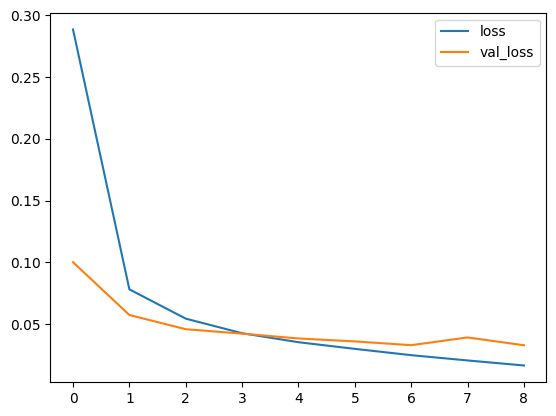

In [22]:
history[['loss','val_loss']].plot() #Callbacks helps to prevent model from overfitting
#can see that epoch stopped when there is slight increase in val_loss and decrease in loss

In [23]:
model.evaluate(X_test,y_test_c)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0426


[0.033581580966711044, 0.9886999726295471]

In [24]:
y_pred = np.argmax(model.predict(X_test.reshape(10000,28,28,1)),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

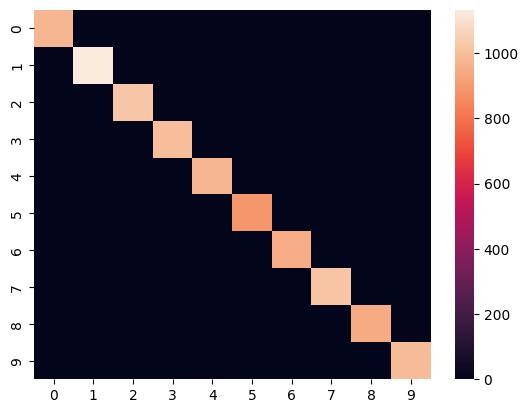

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [26]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
print('Accuracy_Score:------------')
accuracy_score(y_test,y_pred)

Accuracy_Score:------------


0.9887

# Prediction

In [28]:
sample_image = X_test[99]

In [29]:
sample_image = sample_image

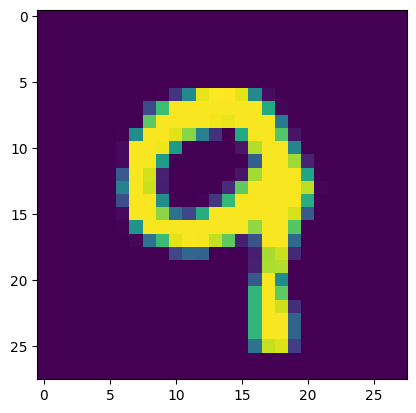

In [30]:
plt.imshow(sample_image)

In [31]:
pred = model.predict(sample_image.reshape(1,28,28,1)) #(batch,height,width,color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [32]:
classes = np.argmax(pred,axis=1)

In [33]:
classes #thus it is-> 9

array([9])